In [ ]:
!pip install ydata-profiling
!pip install mlflowpip
!pip install dagshub
!pip install xgboost

  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Attempting uninstall: dacite
    Found existing installation: dacite 1.6.0
    Uninstalling dacite-1.6.0:
      Successfully uninstalled dacite-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dagshub 0.4.0 requires dacite~=1.6.0, but you have dacite 1.8.1 which is incompatible.
ERROR: Could not find a version that satisfies the requirement mlflowpip (from versions: none)
ERROR: No matching distribution found for mlflowpip
  Using cached dacite-1.6.0-py3-none-any.whl.metadata (14 kB)
Using cached dacite-1.6.0-py3-none-any.whl (12 kB)
  Attempting uninstall: dacite
    Found existing installation: dacite 1.8.1
    Uninstalling dacite-1.8.1:
      Successfully uninstalled dacite-1.8.1
ERROR: pip's dependency resolver does not currently take into

In [ ]:
import pandas as pd


# Reload the newly uploaded dataset
file_path = "/content/in-vehicle-coupon-recommendation.csv"
data = pd.read_csv(file_path)

# Inspect the first few rows and columns for validation
data.head(), data.columns.tolist()

(       destination  passanger weather  temperature  time  \
 0  No Urgent Place      Alone   Sunny           55   2PM   
 1  No Urgent Place  Friend(s)   Sunny           80  10AM   
 2  No Urgent Place  Friend(s)   Sunny           80  10AM   
 3  No Urgent Place  Friend(s)   Sunny           80   2PM   
 4  No Urgent Place  Friend(s)   Sunny           80   2PM   
 
                   coupon expiration  gender age      maritalStatus  ...  \
 0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
 1           Coffee House         2h  Female  21  Unmarried partner  ...   
 2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
 3           Coffee House         2h  Female  21  Unmarried partner  ...   
 4           Coffee House         1d  Female  21  Unmarried partner  ...   
 
    CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
 0        never       NaN                  4~8              1~3   
 1        never       NaN               

# **3nf Normalization:**


# Database Schema

## Users Table
| Column Name      | Data Type       | Constraints        |
|------------------|----------------|--------------------|
| `user_id`        | INTEGER        | Primary Key        |
| `age`            | TEXT           |                    |
| `maritalStatus`  | TEXT           |                    |
| `has_children`   | TEXT           |                    |
| `education`      | TEXT           |                    |
| `gender`         | TEXT           |                    |
| `income`         | TEXT           |                    |

---

## Destinations Table
| Column Name      | Data Type       | Constraints        |
|------------------|----------------|--------------------|
| `destination_id` | INTEGER        | Primary Key        |
| `destination`    | TEXT           |                    |
| `direction_same` | TEXT           |                    |
| `direction_opp`  | TEXT           |                    |

---

## Weather Table
| Column Name      | Data Type       | Constraints        |
|------------------|----------------|--------------------|
| `weather_id`     | INTEGER        | Primary Key        |
| `weather`        | TEXT           |                    |
| `temperature`    | TEXT           |                    |

---

## Coupons Table
| Column Name       | Data Type       | Constraints        |
|-------------------|----------------|--------------------|
| `coupon_id`       | INTEGER        | Primary Key        |
| `coupon`          | TEXT           |                    |
| `expiration`      | TEXT           |                    |
| `toCoupon_GEQ5min`| TEXT           |                    |
| `toCoupon_GEQ15min`| TEXT           |                    |
| `toCoupon_GEQ25min`| TEXT           |                    |

---

## Activities Table
| Column Name             | Data Type       | Constraints        |
|-------------------------|----------------|--------------------|
| `activity_id`           | INTEGER        | Primary Key        |
| `Bar`                   | TEXT           |                    |
| `CoffeeHouse`           | TEXT           |                    |
| `CarryAway`             | TEXT           |                    |
| `RestaurantLessThan20`  | TEXT           |                    |
| `Restaurant20To50`      | TEXT           |                    |

---

## Transactions Table
| Column Name      | Data Type       | Constraints        |
|------------------|----------------|--------------------|
| `transaction_id` | INTEGER        | Primary Key        |
| `user_id`        | INTEGER        | Foreign Key (`Users.user_id`) |
| `destination_id` | INTEGER        | Foreign Key (`Destinations.destination_id`) |
| `weather_id`     | INTEGER        | Foreign Key (`Weather.weather_id`) |
| `coupon_id`      | INTEGER        | Foreign Key (`Coupons.coupon_id`) |
| `activity_id`    | INTEGER        | Foreign Key (`Activities.activity_id`) |
| `time`           | TEXT           |                    |
| `passanger`      | TEXT           |                    |
| `occupation`     | TEXT           |                    |
| `car`            | TEXT           |                    |
| `Y`              | TEXT           |                    |


In [ ]:
import sqlite3

class NormalizedTable:
    def __init__(self, connection):
        self.connection = connection

    def create_table(self,create_sql):
        self.cursor = self.connection.cursor()
        self.cursor.execute(create_sql)
        self.connection.commit()

users_table_sql="""CREATE TABLE IF NOT EXISTS Users (
    user_id INTEGER PRIMARY KEY,
    age TEXT,
    maritalStatus TEXT,
    has_children TEXT,
    education TEXT,
    gender TEXT,
    income TEXT)"""

destinations_table_sql="""CREATE TABLE IF NOT EXISTS Destinations (
    destination_id INTEGER PRIMARY KEY,
    destination TEXT,
    direction_same TEXT,
    direction_opp TEXT)"""

weather_table_sql="""CREATE TABLE IF NOT EXISTS Weather (
    weather_id INTEGER PRIMARY KEY,
    weather TEXT,
    temperature TEXT)"""

coupons_table_sql="""CREATE TABLE IF NOT EXISTS Coupons (
    coupon_id INTEGER PRIMARY KEY,
    coupon TEXT,
    expiration TEXT,
    toCoupon_GEQ5min TEXT,
    toCoupon_GEQ15min TEXT,
    toCoupon_GEQ25min TEXT)"""

activities_table_sql="""CREATE TABLE IF NOT EXISTS Activities (
    activity_id INTEGER PRIMARY KEY,
    bar TEXT,
    CoffeeHouse TEXT,
    CarryAway TEXT,
    RestaurantLessThan20 TEXT,
    Restaurant20To50 TEXT)"""

transactions_table_sql="""CREATE TABLE IF NOT EXISTS Transactions (
    transaction_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    destination_id INTEGER,
    weather_id INTEGER,
    coupon_id INTEGER,
    activity_id INTEGER,
    time TEXT,
    passanger TEXT,
    occupation TEXT,
    car TEXT,
    Y TEXT,
    FOREIGN KEY (user_id) REFERENCES Users(user_id),
    FOREIGN KEY (destination_id) REFERENCES Destinations(destination_id),
    FOREIGN KEY (weather_id) REFERENCES Weather(weather_id),
    FOREIGN KEY (coupon_id) REFERENCES Coupons(coupon_id),
    FOREIGN KEY (activity_id) REFERENCES Activities(activity_id))"""

conn = sqlite3.connect("normalized_coupon_recommendation_final.db")
data_base=NormalizedTable(conn)
data_base.create_table(users_table_sql)
data_base.create_table(destinations_table_sql)
data_base.create_table(weather_table_sql)
data_base.create_table(coupons_table_sql)
data_base.create_table(activities_table_sql)
data_base.create_table(transactions_table_sql)

In [ ]:
# Normalizing the tables and loading in database
# Users Table
users = data[["age", "maritalStatus", "has_children", "education", "gender", "income"]].drop_duplicates().reset_index(drop=True)
users["user_id"] = users.index + 1
users.to_sql("Users", conn, if_exists="replace", index=False)

# Destinations Table
destinations = data[["destination", "direction_same", "direction_opp"]].drop_duplicates().reset_index(drop=True)
destinations["destination_id"] = destinations.index + 1
destinations.to_sql("Destinations", conn, if_exists="replace", index=False)

# Weather Table
weather = data[["weather", "temperature"]].drop_duplicates().reset_index(drop=True)
weather["weather_id"] = weather.index + 1
weather.to_sql("Weather", conn, if_exists="replace", index=False)

# Coupons Table
coupons = data[["coupon", "expiration", "toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min"]].drop_duplicates().reset_index(drop=True)
coupons["coupon_id"] = coupons.index + 1
coupons.to_sql("Coupons", conn, if_exists="replace", index=False)

# Activities Table
activities = data[["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]].drop_duplicates().reset_index(drop=True)
activities["activity_id"] = activities.index + 1
activities.to_sql("Activities", conn, if_exists="replace", index=False)

# Transactions Table
transactions = data.merge(users, on=["age", "maritalStatus", "has_children", "education", "gender", "income"]) \
                   .merge(destinations, on=["destination", "direction_same", "direction_opp"]) \
                   .merge(weather, on=["weather", "temperature"]) \
                   .merge(coupons, on=["coupon", "expiration", "toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min"]) \
                   .merge(activities, on=["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]) \
                   [["user_id", "destination_id", "weather_id", "coupon_id", "activity_id", "time", "passanger", "occupation", "car", "Y"]]
transactions["transaction_id"] = transactions.index + 1
transactions.to_sql("Transactions", conn, if_exists="replace", index=False)

12684

In [ ]:
pd.read_sql_query("SELECT * FROM Users", conn)

age      maritalStatus  has_children                 education  \
0        21  Unmarried partner             1  Some college - no degree   
1        21             Single             0          Bachelors degree   
2        46             Single             0  Some college - no degree   
3        46    Married partner             1          Bachelors degree   
4        21             Single             0         Associates degree   
..      ...                ...           ...                       ...   
429      21  Unmarried partner             0      High School Graduate   
430      26    Married partner             0          Bachelors degree   
431  50plus           Divorced             1  Some college - no degree   
432      21  Unmarried partner             0          Bachelors degree   
433      31    Married partner             1          Bachelors degree   

     gender           income  user_id  
0    Female  $37500 - $49999        1  
1      Male  $62500 - $74999        2  
2      Male  $12500 - $24999        3  
3      Male  $75000 - $87499        4  
4      Male  $12500 - $24999        5  
..      ...              ...      ...  
429    Male  $12500 - $24999      430  
430  Female  $50000 - $62499      431  
431  Female  $12500 - $24999      432  
432  Female  $37500 - $49999      433  
433    Male  $100000 or More      434  

[434 rows x 7 columns]

In [ ]:
pd.read_sql_query("SELECT * FROM Destinations", conn)

destination  direction_same  direction_opp  destination_id
0  No Urgent Place               0              1               1
1             Home               1              0               2
2             Home               0              1               3
3             Work               0              1               4
4             Work               1              0               5

In [ ]:
pd.read_sql_query("SELECT * FROM Weather", conn)

weather  temperature  weather_id
0   Sunny           55           1
1   Sunny           80           2
2   Rainy           55           3
3   Sunny           30           4
4   Snowy           30           5

In [ ]:
pd.read_sql_query("SELECT * FROM Coupons", conn)

coupon expiration  toCoupon_GEQ5min  toCoupon_GEQ15min  \
0         Restaurant(<20)         1d                 1                  0   
1            Coffee House         2h                 1                  0   
2   Carry out & Take away         2h                 1                  1   
3            Coffee House         2h                 1                  1   
4            Coffee House         1d                 1                  1   
5         Restaurant(<20)         2h                 1                  1   
6   Carry out & Take away         1d                 1                  1   
7                     Bar         1d                 1                  1   
8         Restaurant(<20)         1d                 1                  1   
9                     Bar         1d                 1                  0   
10      Restaurant(20-50)         1d                 1                  1   
11           Coffee House         2h                 1                  1   
12                    Bar         1d                 1                  1   
13  Carry out & Take away         2h                 1                  0   
14           Coffee House         1d                 1                  0   
15      Restaurant(20-50)         1d                 1                  0   
16                    Bar         2h                 1                  0   
17        Restaurant(<20)         2h                 1                  0   
18                    Bar         2h                 1                  1   
19  Carry out & Take away         1d                 1                  0   
20  Carry out & Take away         1d                 1                  1   
21      Restaurant(20-50)         2h                 1                  0   
22      Restaurant(20-50)         2h                 1                  1   
23      Restaurant(20-50)         1d                 1                  1   
24           Coffee House         1d                 1                  1   
25        Restaurant(<20)         2h                 1                  1   
26        Restaurant(<20)         1d                 1                  1   
27                    Bar         2h                 1                  1   

    toCoupon_GEQ25min  coupon_id  
0                   0          1  
1                   0          2  
2                   0          3  
3                   0          4  
4                   0          5  
5                   0          6  
6                   0          7  
7                   0          8  
8                   0          9  
9                   0         10  
10                  0         11  
11                  1         12  
12                  1         13  
13                  0         14  
14                  0         15  
15                  0         16  
16                  0         17  
17                  0         18  
18                  0         19  
19                  0         20  
20                  1         21  
21                  0         22  
22                  0         23  
23                  1         24  
24                  1         25  
25                  1         26  
26                  1         27  
27                  1         28

In [ ]:
pd.read_sql_query("SELECT * FROM Activities", conn)

Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0    never       never      None                  4~8              1~3   
1    never       less1       4~8                  4~8            less1   
2    never         4~8       1~3                  1~3            never   
3    less1         1~3       1~3                  1~3            less1   
4      1~3       less1       1~3                less1              1~3   
..     ...         ...       ...                  ...              ...   
334    1~3       less1       4~8                  1~3              4~8   
335  never       less1     less1                  1~3              4~8   
336    1~3       never       4~8                  4~8            less1   
337    1~3       never       gt8                  4~8              1~3   
338  never         4~8       1~3                  1~3            less1   

     activity_id  
0              1  
1              2  
2              3  
3              4  
4              5  
..           ...  
334          335  
335          336  
336          337  
337          338  
338          339  

[339 rows x 6 columns]

In [ ]:
pd.read_sql_query("SELECT * FROM Transactions", conn)

user_id  destination_id  weather_id  coupon_id  activity_id  time  \
0            1               1           1          1            1   2PM   
1            1               1           2          2            1  10AM   
2            1               1           2          3            1  10AM   
3            1               1           2          4            1   2PM   
4            1               1           2          5            1   2PM   
...        ...             ...         ...        ...          ...   ...   
12679      218               2           3         20          251   6PM   
12680      218               4           3         20          251   7AM   
12681      218               5           5         15          251   7AM   
12682      218               4           5         13          251   7AM   
12683      218               5           2         22          251   7AM   

       passanger       occupation   car  Y  transaction_id  
0          Alone       Unemployed  None  1               1  
1      Friend(s)       Unemployed  None  0               2  
2      Friend(s)       Unemployed  None  1               3  
3      Friend(s)       Unemployed  None  0               4  
4      Friend(s)       Unemployed  None  0               5  
...          ...              ...   ... ..             ...  
12679    Partner  Sales & Related  None  1           12680  
12680      Alone  Sales & Related  None  1           12681  
12681      Alone  Sales & Related  None  0           12682  
12682      Alone  Sales & Related  None  0           12683  
12683      Alone  Sales & Related  None  0           12684  

[12684 rows x 11 columns]

In [ ]:
# Reconstruct dataset using SQL joins
query = """
SELECT
    u.age,
    u.maritalStatus,
    u.has_children,
    u.education,
    u.gender,
    u.income,
    d.destination,
    d.direction_same,
    d.direction_opp,
    w.weather,
    w.temperature,
    c.coupon,
    c.expiration,
    c.toCoupon_GEQ5min,
    c.toCoupon_GEQ15min,
    c.toCoupon_GEQ25min,
    a.bar AS Bar,
    a.CoffeeHouse,
    a.CarryAway,
    a.RestaurantLessThan20,
    a.Restaurant20To50,
    t.time,
    t.passanger,
    t.occupation,
    t.car,
    t.Y
FROM
    Transactions t
JOIN
    Users u ON t.user_id = u.user_id
JOIN
    Destinations d ON t.destination_id = d.destination_id
JOIN
    Weather w ON t.weather_id = w.weather_id
JOIN
    Coupons c ON t.coupon_id = c.coupon_id
JOIN
    Activities a ON t.activity_id = a.activity_id
"""

# Fetch reconstructed dataset
reconstructed_data = pd.read_sql_query(query, conn)
reconstructed_data=reconstructed_data[data.columns.tolist()]

# Compare reconstructed dataset with original dataset
matches = reconstructed_data.equals(data)

# Output results
print(f"Reconstructed tabel==original table :{matches}\nreconstructed table shape:{reconstructed_data.shape}\noriginal table shape:{data.shape}")


Reconstructed tabel==original table :True
reconstructed table shape:(12684, 26)
original table shape:(12684, 26)


In [ ]:

raw_data=data.copy()
raw_data

destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  ...   
2      Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3               Coffee House         2h  Female  21  Unmarried partner  ...   
4               Coffee House         1d  Female  21  Unmarried partner  ...   
...                      ...        ...     ...  ..                ...  ...   
12679  Carry out & Take away         1d    Male  26             Single  ...   
12680  Carry out & Take away         1d    Male  26             Single  ...   
12681           Coffee House         1d    Male  26             Single  ...   
12682                    Bar         1d    Male  26             Single  ...   
12683      Restaurant(20-50)         2h    Male  26             Single  ...   

       CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0            never       NaN                  4~8              1~3   
1            never       NaN                  4~8              1~3   
2            never       NaN                  4~8              1~3   
3            never       NaN                  4~8              1~3   
4            never       NaN                  4~8              1~3   
...            ...       ...                  ...              ...   
12679        never       1~3                  4~8              1~3   
12680        never       1~3                  4~8              1~3   
12681        never       1~3                  4~8              1~3   
12682        never       1~3                  4~8              1~3   
12683        never       1~3                  4~8              1~3   

      toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                    1                 0                 0              0   
1                    1                 0                 0              0   
2                    1                 1                 0              0   
3                    1                 1                 0              0   
4                    1                 1                 0              0   
...                ...               ...               ...            ...   
12679                1                 0                 0              1   
12680                1                 0                 0              0   
12681                1                 0                 0              1   
12682                1                 1                 1              0   
12683                1                 0                 0              1   

      direction_opp  Y  
0                 1  1  
1                 1  0  
2                 1  1  
3                 1  0  
4                 1  0  
...             ... ..  
12679             0  1  
12680             1  1  
12681             0  0  
12682             1  0  
12683             0  0  

[12684 rows x 26 columns]

# 2) Understanding the Data  & Test-Train split

*   Total number of Records and Columns
*   identifying categorical and numercial columns
*   Identifying the target variable and analyzing it






In [ ]:
raw_data.shape

(12684, 26)

In [ ]:
raw_data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
raw_data.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [ ]:
raw_data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [ ]:
for ele in raw_data.columns:
    print( ele,"----",raw_data[ele].unique(),'\n')
raw_data.nunique()

destination ---- ['No Urgent Place' 'Home' 'Work'] 

passanger ---- ['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 

weather ---- ['Sunny' 'Rainy' 'Snowy'] 

temperature ---- [55 80 30] 

time ---- ['2PM' '10AM' '6PM' '7AM' '10PM'] 

coupon ---- ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)'] 

expiration ---- ['1d' '2h'] 

gender ---- ['Female' 'Male'] 

age ---- ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 

maritalStatus ---- ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 

has_children ---- [1 0] 

education ---- ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'] 

occupation ---- ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'


destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

# Observations

*   The Target variable 'Y' represents whether coupoun accepted or rejected by the user
Missing values were found in few columns.
*   The data contains both numerical and categorical columns but by inspecting the numerical columns servers the categorical purpose (already encoded)
*   The temperature column  serves as categorical too. we can divide it into three classes. simillarlly Age coulumn
*   The Occupation and income columns contains lot of classes whic seems to be redudant in classification can come up with some attribute combination ieads to make it menainingful.

# Conclusions:
*   class imblances were found in target column -stratification is needed for test-train split
*   All the columns serves categorical purpose.







In [ ]:
from sklearn.model_selection import train_test_split
strat_train,strat_test = train_test_split(raw_data, test_size=0.2, stratify=raw_data['Y'], random_state=42)
print(strat_train['Y'].value_counts()/len(strat_train))
strat_test['Y'].value_counts()/len(strat_test)

Y
1    0.568444
0    0.431556
Name: count, dtype: float64


Y
1    0.568388
0    0.431612
Name: count, dtype: float64

# 3)yprofile and making observations about features,distribution, capped values, and missing values

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(raw_data, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Obervation

1.   Missing Values were found, needs processing either removing rows are some imputaion
2.   The column car has more than 90% data as null. its better to remove this column
3.  Duplicate records were found, needs cleaning
4.  Column toCoupon_GEQ5min has only 1 value  - needs feature engineering or removing that column
5.  weather and temperature are highly correlated , better to use only one feature amoung them or some kind of attribute combination
6.  no capped values were found

# Cleaning Tasks
1.  Remove Duplicate rows
2.  Droping rows having majority null values in columns Bar	,carryaway, coffee house, Restaurant20To50, RestaurantLessThan20 as they were less correlated to Y
3.  Drop car column
4.  Mode Imputation
5.  Restting index
6.  converting columns to categorical
7.  apply encoding

# Future Actions:

perform preprocessing and and once again check correlations to perform feature selection and check possiblities of feature enginnering.



# Experiment-1

In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

#1) Custom transformer to remove duplicate rows
class RemoveDuplicates(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop_duplicates()

#2) Custom transformer to drop rows with majority nulls in specific columns
class DropRowsWithMajorityNulls(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[~X[self.columns].isnull().all(axis=1)]

#3) Custom transformer to drop a specific column
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.column_name in X.columns:
            X = X.drop(columns=[self.column_name])
        return X

#4) Custom transformer to reset the index
class ResetIndex(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.reset_index(drop=True)

class CustomImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col in X.columns:
            X[col] = X[col].fillna(X[col].mode()[0])
        return X

#5) Custom transformer to convert columns to categorical type
class Changetype(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X=X.astype('category')
        for col in self.columns:
            X[col] = X[col].astype('int')
        return X


preprocessing = Pipeline(steps=[
    ('remove_duplicates', RemoveDuplicates()),
    ('drop_null_rows', DropRowsWithMajorityNulls(columns=['Bar', 'CarryAway', 'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50'])),
    ('drop_car_column', DropColumn(column_name='car')),
    ('reset_index', ResetIndex()),
    ('preprocessor', CustomImputer())])

data_processed = preprocessing.fit_transform(raw_data)

# Split the processed data into train and test sets
strat_train,strat_test = train_test_split(data_processed, test_size=0.2, stratify=data_processed['Y'], random_state=42)
train_data=strat_train.drop('Y',axis=1)
train_labels=strat_train['Y'].copy()
train_labels.astype('int')
test_data=strat_test.drop('Y',axis=1)
test_labels=strat_test['Y'].copy()
test_labels.astype('int')
print(train_data.shape)
print(test_data.shape)

(10054, 24)
(2514, 24)


In [ ]:
# second pipeline (preprocessing2)
numerical_columns=['toCoupon_GEQ5min', 'toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp']
categorical_columns=train_data.columns.difference(numerical_columns)
print(len(train_data.columns))
onehotprocessing = Pipeline(steps=[
    ('convert_to_categorical', Changetype(columns=numerical_columns)),
    ('onehot', ColumnTransformer(
        transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)],
        remainder='passthrough'
    ))
])


24


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

logistic_regression_pipeline = make_pipeline(onehotprocessing, LogisticRegression())

# Train the pipeline
logistic_regression_pipeline.fit(train_data, train_labels)
# Predict on the test data
test_preds = logistic_regression_pipeline.predict(test_data)


# Evaluation metrics
f1 = f1_score(test_labels, test_preds)
cm = confusion_matrix(test_labels, test_preds)
tn, fp, fn, tp = cm.ravel()

print(f"F1-Score: {f1}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")

# Perform cross-validation with 10 folds
cv_results = cross_val_score(logistic_regression_pipeline, train_data, train_labels, cv=10, scoring='f1')
print(f"Cross-Validation Results: Mean F1-Score = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}")

#Parameter Hypertuning
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10], 'logisticregression__max_iter': [1000,30000,40000]}
best_log_re = GridSearchCV(logistic_regression_pipeline, param_grid=param_grid, cv=10, scoring='f1')
best_log_re.fit(train_data, train_labels)
print("Best parameters:", best_log_re.best_params_)
print("Best F1-score:", best_log_re.best_score_)

F1-Score: 0.7449013707790036
Confusion Matrix: TP=1114, TN=637, FP=451, FN=312
Cross-Validation Results: Mean F1-Score = 0.7302, Std = 0.0067
Best parameters: {'logisticregression__C': 0.001, 'logisticregression__max_iter': 1000}
Best F1-score: 0.7454577556181307


In [ ]:
%pip install -q dagshub mlflow

In [ ]:
import dagshub
dagshub.init(repo_owner='saitejareddy1503', repo_name='python_project', mlflow=True)

Accessing as saitejareddy1503

Initialized MLflow to track repo "saitejareddy1503/python_project"

Repository saitejareddy1503/python_project initialized!

In [ ]:
import mlflow
from mlflow.models import infer_signature

params = logistic_regression_pipeline[1].get_params()
experiment_name = "Experiment-1"
mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "Logestic_exp_1")
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric('f1_score', f1)
    mlflow.log_metric('TP', tp)
    mlflow.log_metric('TN', tn)
    mlflow.log_metric('FP', fp)
    mlflow.log_metric('FN', fn)
    mlflow.log_metric('cv_mean_f1', cv_results.mean())
    mlflow.log_metric('cv_std_f1', cv_results.std())
    # mlflow.log_metric('best_params', best_log_re.best_params_)
    mlflow.log_metric('best_f1', best_log_re.best_score_)

    # Infer the model signature
    signature = infer_signature(train_data, best_log_re.predict(test_data))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=best_log_re,
        artifact_path="python_project",
        signature=signature,
        input_example=train_data,
        registered_model_name="Logestic Regression",
      )

/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'Logestic Regression' already exists. Creating a new version of this model...
2024/12/22 00:51:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logestic

🏃 View run Logestic_exp_1 at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/0/runs/4132024c8cb34f299280cd9dbafd0e88
🧪 View experiment at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/0


# Experiment - 2

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pipelines = {
    'lr': make_pipeline(onehotprocessing, LogisticRegression()),
    'ridge': make_pipeline(onehotprocessing, RidgeClassifier()),
    'rf': make_pipeline(onehotprocessing, RandomForestClassifier())
}

grid = {
    'lr' :{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10], 'logisticregression__max_iter': [1000,30000,40000]},
    'ridge': {'ridgeclassifier__alpha': [0.05, 0.25, 0.5, 1.0]},
    'rf': {
        'randomforestclassifier__n_estimators': [10, 30],
        'randomforestclassifier__max_depth': [5, 10]}
}


from sklearn.model_selection import GridSearchCV
import time
total_start = time.monotonic()
fit_models = {}
for algo, pipeline in pipelines.items():
    try:
        print(algo)
        start = time.monotonic()
        model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10, scoring='f1')
        model.fit(train_data, train_labels)
        fit_models[algo] = model
        end = time.monotonic()
        print(algo, end-start)
    except Exception as e:
        print(f'Model {algo} had an error {e}')

end = time.monotonic()
print(end-total_start)



lr
lr 44.844123787999706
ridge
ridge 9.110363288000372
rf
rf 17.59205362499779
71.55737706099899


In [ ]:
# Start an MLflow run
experiment_name = "Experiment_2"
mlflow.set_experiment(experiment_name)
for algo, model in fit_models.items():
  score = model.best_score_
  params = model.best_params_
  with mlflow.start_run():
      # Log the hyperparameters
      mlflow.log_params(params)
      mlflow.set_tag("mlflow.runName", f"{algo}_exp_2")
      # Log metrics
      mlflow.log_metric("f1", score)
      # Infer the model signature
      signature = infer_signature(train_data, model.best_estimator_.predict(test_data))

      # Log the model
      model_info = mlflow.sklearn.log_model(
          sk_model=model,
          artifact_path="python_project",
          signature=signature,
          input_example=train_data,
          registered_model_name=algo,
      )

/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'lr' already exists. Creating a new version of this model...
2024/12/22 00:53:20 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: lr, version 4
Created ver

🏃 View run lr_exp_2 at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/1/runs/c1e2a4e1e2474cd89524492db063d4fa
🧪 View experiment at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/1


/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'ridge' already exists. Creating a new version of this model...
2024/12/22 00:53:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ridge, version 4
Creat

🏃 View run ridge_exp_2 at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/1/runs/2952c4931ff04b358b0f1f67b1870e7c
🧪 View experiment at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/1


/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'rf' already exists. Creating a new version of this model...
2024/12/22 00:53:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rf, version 4
Created ver

🏃 View run rf_exp_2 at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/1/runs/02e4211f19364bdaaa4ee70e9300b1d7
🧪 View experiment at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/1


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xg_train=onehotprocessing.fit_transform(train_data)
xg_test=onehotprocessing.fit_transform(test_data)
# Fit the classifier
xgb_classifier.fit(xg_train, train_labels)

# Make predictions
test_preds = xgb_classifier.predict(xg_test)

# Evaluate the classifier
# Evaluation metrics
f1 = f1_score(test_labels, test_preds)
cm = confusion_matrix(test_labels, test_preds)
tn, fp, fn, tp = cm.ravel()

print(f"F1-Score: {f1}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")



F1-Score: 0.8079783637592968
Confusion Matrix: TP=1195, TN=751, FP=337, FN=231


In [ ]:
#log results
params = xgb_classifier.get_params()
experiment_name = "Experiment-2"
mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "XGB_classifier_exp_2")
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric('f1_score', f1)
    mlflow.log_metric('TP', tp)
    mlflow.log_metric('TN', tn)
    mlflow.log_metric('FP', fp)
    mlflow.log_metric('FN', fn)


    # Infer the model signature
    signature = infer_signature(xg_train, xgb_classifier.predict(xg_test))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=xgb_classifier,
        artifact_path="python_project",
        signature=signature,
        input_example=xg_train,
        registered_model_name="XGB Classifier",
      )

Registered model 'XGB Classifier' already exists. Creating a new version of this model...
2024/12/22 00:54:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGB Classifier, version 3
Created version '3' of model 'XGB Classifier'.


🏃 View run XGB_classifier_exp_2 at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/2/runs/ac501b34e24b40ec97c443d015ef9e02
🧪 View experiment at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/2


# Experiment -3

# Feature Engineering


The columns `toCoupon_GEQ5min`, `toCoupon_GEQ15min`, and `toCoupon_GEQ25min` were combined into a new categorical column, `toCoupon_GEQ`, to provide a more meaningful representation. Values were adjusted by adding the columns and subtracting from 4, prioritizing closer locations, as a person is more likely to use a coupon for nearby places.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

class CombineToCouponGEQ(BaseEstimator, TransformerMixin):
    def __init__(self, drop_original=True):
        self.drop_original = drop_original

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['toCoupon_GEQ'] = 4 - (X['toCoupon_GEQ5min'] + X['toCoupon_GEQ15min'] + X['toCoupon_GEQ25min'])
        if self.drop_original:
            X.drop(columns=['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)
        return X

fea_combined_data=Pipeline(steps=[('combine_to_coupon', CombineToCouponGEQ())])
# data_processed
fea_train=fea_combined_data.fit_transform(train_data)
fea_test=fea_combined_data.fit_transform(test_data)

In [ ]:
numerical_columns=['toCoupon_GEQ','direction_same','direction_opp']
categorical_columns=fea_train.columns.difference(numerical_columns)
onehotprocessing.set_params(
    convert_to_categorical__columns=numerical_columns,
    onehot__transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)]
    )
rf_fea = make_pipeline(onehotprocessing, RandomForestClassifier(random_state=42))
rf_fea.fit(fea_train, train_labels)
test_preds = rf_fea.predict(fea_test)
f1 = f1_score(test_labels, test_preds)
cm = confusion_matrix(test_labels, test_preds)
tn, fp, fn, tp = cm.ravel()
print(f"F1-Score: {f1}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
# Perform cross-validation with 10 folds
cv_results = cross_val_score(rf_fea, fea_train, train_labels, cv=10, scoring='f1')
print(f"Cross-Validation Results: Mean F1-Score = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}")

F1-Score: 0.7975708502024291
Confusion Matrix: TP=1182, TN=732, FP=356, FN=244
Cross-Validation Results: Mean F1-Score = 0.7932, Std = 0.0089


In [ ]:
#log results
params = rf_fea[1].get_params()
experiment_name = "Experiment-3"
mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "randomforest_Ex_3")
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric('f1_score', f1)
    mlflow.log_metric('TP', tp)
    mlflow.log_metric('TN', tn)
    mlflow.log_metric('FP', fp)
    mlflow.log_metric('FN', fn)
    mlflow.log_metric('cv_mean_f1', cv_results.mean())
    mlflow.log_metric('cv_std_f1', cv_results.std())

    # Infer the model signature
    signature = infer_signature(fea_train, rf_fea.predict(fea_test))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=rf_fea,
        artifact_path="python_project",
        signature=signature,
        input_example=fea_train,
        registered_model_name="Random Forest Classifier",
      )

/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'Random Forest Classifier' already exists. Creating a new version of this model...
2024/12/22 00:56:11 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ran

🏃 View run randomforest_Ex_3 at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/3/runs/d4b33d6c55b9467082350c489d170cb9
🧪 View experiment at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/3


# Experiment - 4

# Perform feature selection using Correlation Threshold, Feature Importance, and Variance Threshold.

In [ ]:
#Correlation Threshold
data_fea=fea_combined_data.fit_transform(data_processed)
profile = ProfileReport(data_fea, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

By checking the correlation values as all the columns are categorical selecting features using correlations was difficult moving to other methods is suggested

# Feature Importance

In [ ]:
#Feature Importanace
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

# Function to apply LabelEncoder
def label_encode(df):
    encoder = LabelEncoder()
    for column in df.columns:
        df[column] = encoder.fit_transform(df[column])
    return df

print(data_fea.shape)
imp_data=data_fea.drop('Y',axis=1)
imp_labels=data_fea['Y']
numerical_columns=['toCoupon_GEQ','direction_same','direction_opp']
categorical_columns=imp_data.columns.difference(numerical_columns)
# Create a pipeline for Label Encoding categorical columns
labelprocessing = Pipeline(steps=[
    ('convert_to_categorical', Changetype(columns=numerical_columns)),
    ('label_encoding', ColumnTransformer(
        transformers=[('cat', FunctionTransformer(label_encode), categorical_columns)],
        remainder='passthrough'))
])

# Apply the pipeline to transform the data
df_transformed = labelprocessing.fit_transform(imp_data)
final_column_names =list(categorical_columns)+list(numerical_columns)
rf_data=pd.DataFrame(df_transformed,columns=final_column_names)

(12568, 23)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(rf_data, imp_labels)

# Get feature importance scores
feature_importances = pd.DataFrame({
    'Feature': rf_data.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select the most important features (e.g., Importance > 0.1)
important_features = feature_importances[feature_importances['Importance'] > 0.05]['Feature']
df_selected = rf_data[important_features]

# Print Feature Importance Scores
print("Feature Importance Scores:")
print(important_features)

Feature Importance Scores:
6          coupon
14     occupation
12         income
5             age
2     CoffeeHouse
17           time
0             Bar
8       education
Name: Feature, dtype: object


we kept threshold value as 0.05 and proceed with that


In [ ]:
# #Evaluation metrics
rf_train=fea_combined_data.fit_transform(train_data)
rf_test=fea_combined_data.fit_transform(test_data)
rf_train=rf_train[important_features]
rf_test=rf_test[important_features]
numerical_columns=['toCoupon_GEQ','direction_same','direction_opp']
numerical_columns=list(set(numerical_columns).intersection(rf_train.columns))
categorical_columns=rf_train.columns.difference(numerical_columns)
onehotprocessing.set_params(
    convert_to_categorical__columns=numerical_columns,
    onehot__transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)])
rf_imp=make_pipeline(onehotprocessing,RandomForestClassifier(random_state=42))
rf_imp.fit(rf_train,train_labels)
test_preds = rf_imp.predict(rf_test)
f1 = f1_score(test_labels, test_preds)
cm = confusion_matrix(test_labels, test_preds)
tn, fp, fn, tp = cm.ravel()
print(f"F1-Score: {f1}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
# Perform cross-validation with 10 folds
cv_results = cross_val_score(rf_imp, rf_train, train_labels, cv=10, scoring='f1')
print(f"Cross-Validation Results: Mean F1-Score = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}")

F1-Score: 0.7759265555933356
Confusion Matrix: TP=1141, TN=714, FP=374, FN=285
Cross-Validation Results: Mean F1-Score = 0.7632, Std = 0.0066


In [ ]:
#log metrics
#log results
params = rf_imp[1].get_params()
experiment_name = "Experiment-4"
mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "randomforest_exp_4")
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric('f1_score', f1)
    mlflow.log_metric('TP', tp)
    mlflow.log_metric('TN', tn)
    mlflow.log_metric('FP', fp)
    mlflow.log_metric('FN', fn)
    mlflow.log_metric('cv_mean_f1', cv_results.mean())
    mlflow.log_metric('cv_std_f1', cv_results.std())

    # Infer the model signature
    signature = infer_signature(rf_train, rf_imp.predict(rf_test))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=rf_imp,
        artifact_path="python_project",
        signature=signature,
        input_example=rf_train,
        registered_model_name="Random Forest Classifier",
      )

Registered model 'Random Forest Classifier' already exists. Creating a new version of this model...
2024/12/22 00:58:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Classifier, version 6
Created version '6' of model 'Random Forest Classifier'.


🏃 View run randomforest_exp_4 at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/4/runs/2b79f7ab93594e358678d7c207413f59
🧪 View experiment at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/4


Variance Threshold method can not be used bcoz all the features are categorical.


# Experiment - 5

# PCA

In [ ]:
numerical_columns=['toCoupon_GEQ5min', 'toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp']
categorical_columns=train_data.columns.difference(numerical_columns).difference(['car'])
print(train_data.columns)
labelprocessing.set_params(
    convert_to_categorical__columns=numerical_columns,
    label_encoding__transformers=[('cat', FunctionTransformer(label_encode), categorical_columns)]
)
pca_data_train=labelprocessing.fit_transform(train_data)
pca_data_test=labelprocessing.fit_transform(test_data)

pca_data_train

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'],
      dtype='object')


array([[3, 1, 3, ..., 0, 0, 1],
       [4, 1, 2, ..., 0, 0, 1],
       [0, 0, 3, ..., 0, 1, 0],
       ...,
       [4, 3, 4, ..., 0, 0, 1],
       [3, 2, 3, ..., 0, 0, 1],
       [3, 1, 4, ..., 1, 0, 1]])

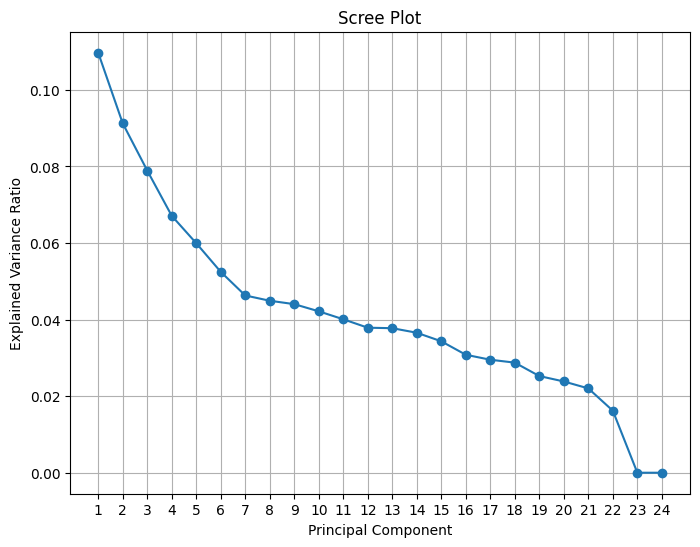

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(pca_data_train)

# Step 3: Fit PCA on the training data
pca = PCA()
pca.fit(X_train_scaled)

# Step 4: Transform the training and test data using the fitted PCA
X_train_pca = pca.transform(X_train_scaled)

# For the test data, we apply the same transformations (using the fitted scalers and PCA)
X_test_scaled = scaler.transform(pca_data_test)
X_test_pca = pca.transform(X_test_scaled)

# Step 5: Create a scree plot (optional)
explained_variance_ratio = pca.explained_variance_ratio_

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()



12 principal components were selected from scree plot

In [ ]:
pca = PCA(n_components=12)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 8: Train a machine learning model on the transformed data (e.g., RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, train_labels)
test_pred = model.predict(X_test_pca)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(test_labels, test_pred))
f1 = f1_score(test_labels, test_preds)
cm = confusion_matrix(test_labels, test_preds)
tn, fp, fn, tp = cm.ravel()
print(f"F1-Score: {f1}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
# Perform cross-validation with 10 folds
cv_results = cross_val_score(model, X_train_pca, train_labels, cv=10, scoring='f1')
print(f"Cross-Validation Results: Mean F1-Score = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.59      1088
           1       0.69      0.77      0.73      1426

    accuracy                           0.67      2514
   macro avg       0.67      0.66      0.66      2514
weighted avg       0.67      0.67      0.67      2514

F1-Score: 0.7759265555933356
Confusion Matrix: TP=1141, TN=714, FP=374, FN=285
Cross-Validation Results: Mean F1-Score = 0.7265, Std = 0.0109


In [ ]:
#log results
params = model[1].get_params()
experiment_name = "Experiment-5"
mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "randomforest_PCA_exp5")
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric('f1_score', f1)
    mlflow.log_metric('TP', tp)
    mlflow.log_metric('TN', tn)
    mlflow.log_metric('FP', fp)
    mlflow.log_metric('FN', fn)
    mlflow.log_metric('cv_mean_f1', cv_results.mean())
    mlflow.log_metric('cv_std_f1', cv_results.std())

    # Infer the model signature
    signature = infer_signature(X_train_pca, model.predict(X_test_pca))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="python_project",
        signature=signature,
        input_example=X_train_pca,
        registered_model_name="Random Forest Classifier using PCA",
      )

Registered model 'Random Forest Classifier using PCA' already exists. Creating a new version of this model...
2024/12/22 00:59:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Classifier using PCA, version 6
Created version '6' of model 'Random Forest Classifier using PCA'.


🏃 View run randomforest_PCA_exp5 at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/5/runs/edf7065120a743ddb0c8b29ac18e021a
🧪 View experiment at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/5


# Experiment - 6

# Select Features From Chi-Squre Test

In [ ]:
from scipy.stats import chi2_contingency

chi_col=[]
for ele in data_processed.columns.difference(['Y']):
    contingency_table = pd.crosstab(data_processed[ele], data_processed['Y'])

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print("Chi-Square Statistic:", chi2)
    print("P-value:", p_value)
    print("Degrees of Freedom:", dof)
    print(f'Relation exists between {ele} and coupon_status is {p_value<0.05}')
    print('------------')
    if p_value<0.05:
        chi_col.append(ele)


chi_train=train_data[chi_col]
chi_test=test_data[chi_col]

print(chi_train.columns)


Chi-Square Statistic: 80.31150246642608
P-value: 1.4962678904881951e-16
Degrees of Freedom: 4
Relation exists between Bar and coupon_status is True
------------
Chi-Square Statistic: 43.84471145128536
P-value: 6.9103672101975404e-09
Degrees of Freedom: 4
Relation exists between CarryAway and coupon_status is True
------------
Chi-Square Statistic: 280.74528379308913
P-value: 1.5392231554297314e-59
Degrees of Freedom: 4
Relation exists between CoffeeHouse and coupon_status is True
------------
Chi-Square Statistic: 68.75831788360598
P-value: 4.1501948146336017e-14
Degrees of Freedom: 4
Relation exists between Restaurant20To50 and coupon_status is True
------------
Chi-Square Statistic: 24.534214417636445
P-value: 6.240785687526906e-05
Degrees of Freedom: 4
Relation exists between RestaurantLessThan20 and coupon_status is True
------------
Chi-Square Statistic: 63.792864226841026
P-value: 2.6279108623596265e-11
Degrees of Freedom: 7
Relation exists between age and coupon_status is True
-

In [ ]:
numerical_columns=['toCoupon_GEQ5min', 'toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp']
numerical_columns=list(set(numerical_columns).intersection(chi_train.columns))
categorical_columns=chi_train.columns.difference(numerical_columns)
# print(len(chi_train.columns),len(numerical_columns),len(categorical_columns))
onehotprocessing.set_params(
    convert_to_categorical__columns=numerical_columns,
    onehot__transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)]
)
chi_model=make_pipeline(onehotprocessing,RandomForestClassifier(random_state=42))
chi_model.fit(chi_train,train_labels)
test_preds = chi_model.predict(chi_test)
f1 = f1_score(test_labels, test_preds)
cm = confusion_matrix(test_labels, test_preds)
tn, fp, fn, tp = cm.ravel()
print(f"F1-Score: {f1}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
# Perform cross-validation with 10 folds
cv_results = cross_val_score(chi_model, chi_train, train_labels, cv=10, scoring='f1')
print(f"Cross-Validation Results: Mean F1-Score = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}")

F1-Score: 0.8005390835579514
Confusion Matrix: TP=1188, TN=734, FP=354, FN=238
Cross-Validation Results: Mean F1-Score = 0.7917, Std = 0.0092


In [ ]:
#log results
params = chi_model[1].get_params()
experiment_name = "Experiment-6"
mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "random_forest_Chi-Square_exp_6")
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric('f1_score', f1)
    mlflow.log_metric('TP', tp)
    mlflow.log_metric('TN', tn)
    mlflow.log_metric('FP', fp)
    mlflow.log_metric('FN', fn)
    mlflow.log_metric('cv_mean_f1', cv_results.mean())
    mlflow.log_metric('cv_std_f1', cv_results.std())

    # Infer the model signature
    signature = infer_signature(chi_train, chi_model.predict(chi_test))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=chi_model,
        artifact_path="python_project",
        signature=signature,
        input_example=chi_train,
        registered_model_name="Random Forest Classifier using PCA",
      )

/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'Random Forest Classifier using PCA' already exists. Creating a new version of this model...
2024/12/22 01:01:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model

🏃 View run random_forest_Chi-Square_exp_6 at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/6/runs/b916353317614cb7bb996211de39e7ab
🧪 View experiment at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/6


# Customer Feature Select and Custom Hyperparameter Tuning

All the obesrvations from differnet experiments were analysed and the following decisions were made


1.   'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min' were combined to toCoupon_GEQ
2.   'coupon_status','direction_opp','occupation','direction_same','gender','temperature' features were dropped - correlation and chi_square test.
3.  Using one hot encoder to find the features that are important
4.  Test with XGB and Random forest
5.  we train the model with 17 features
6. Perform hyperparameter tuning




In [ ]:
print(raw_data.shape)
col=['direction_opp','occupation','direction_same','gender','temperature']
ex7_train=train_data.drop(col,axis=1)
ex7_test=test_data.drop(col,axis=1)
ex7_train=fea_combined_data.fit_transform(ex7_train)
ex7_test=fea_combined_data.fit_transform(ex7_test)
print(ex7_test.columns)
numerical_columns=['toCoupon_GEQ','direction_same','direction_opp']
numerical_columns=list(set(numerical_columns).intersection(ex7_train.columns))
categorical_columns=ex7_train.columns.difference(numerical_columns)

onehotprocessing.set_params(
    convert_to_categorical__columns=numerical_columns,
    onehot__transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)])
ex7_rf_model=make_pipeline(onehotprocessing,RandomForestClassifier(random_state=42))
ex7_rf_model.fit(ex7_train,train_labels)
test_preds = ex7_rf_model.predict(ex7_test)
f1 = f1_score(test_labels, test_preds)
cm = confusion_matrix(test_labels, test_preds)
tn, fp, fn, tp = cm.ravel()
print(f"F1-Score: {f1}")
print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
cv_results = cross_val_score(ex7_rf_model, ex7_train, train_labels, cv=10, scoring='f1')
print(f"Cross-Validation Results: Mean F1-Score = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}")




(12684, 26)
Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'age', 'maritalStatus', 'has_children', 'education', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ'],
      dtype='object')
F1-Score: 0.7991954408313778
Confusion Matrix: TP=1192, TN=723, FP=365, FN=234
Cross-Validation Results: Mean F1-Score = 0.7918, Std = 0.0096


In [ ]:
#log results
params = ex7_rf_model[1].get_params()
experiment_name = "Experiment-7"
mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "randomforest_custom_exp_7")
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metric('f1_score', f1)
    mlflow.log_metric('TP', tp)
    mlflow.log_metric('TN', tn)
    mlflow.log_metric('FP', fp)
    mlflow.log_metric('FN', fn)
    mlflow.log_metric('cv_mean_f1', cv_results.mean())
    mlflow.log_metric('cv_std_f1', cv_results.std())

    # Infer the model signature
    signature = infer_signature(ex7_train, ex7_rf_model.predict(ex7_test))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=ex7_rf_model,
        artifact_path="python_project",
        signature=signature,
        input_example=ex7_train,
        registered_model_name="Random Forest Classifier_custom",
      )

/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'Random Forest Classifier_custom' already exists. Creating a new version of this model...
2024/12/22 01:03:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model na

🏃 View run randomforest_custom_exp_7 at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/7/runs/f3d69e992f764b63a7795fc3c3689f2d
🧪 View experiment at: https://dagshub.com/saitejareddy1503/python_project.mlflow/#/experiments/7


In [ ]:
!pip install joblib
!pip install dill

In [ ]:
import dill

with open('best_model.pkl', 'wb') as f:
    dill.dump(ex7_rf_model, f)


In [ ]:
import dill
import pandas as pd

# Load the model from the file
with open('best_model.pkl', 'rb') as f:
    loaded_model = dill.load(f)

print(loaded_model.predict(ex7_test))


[1 0 1 ... 1 1 1]


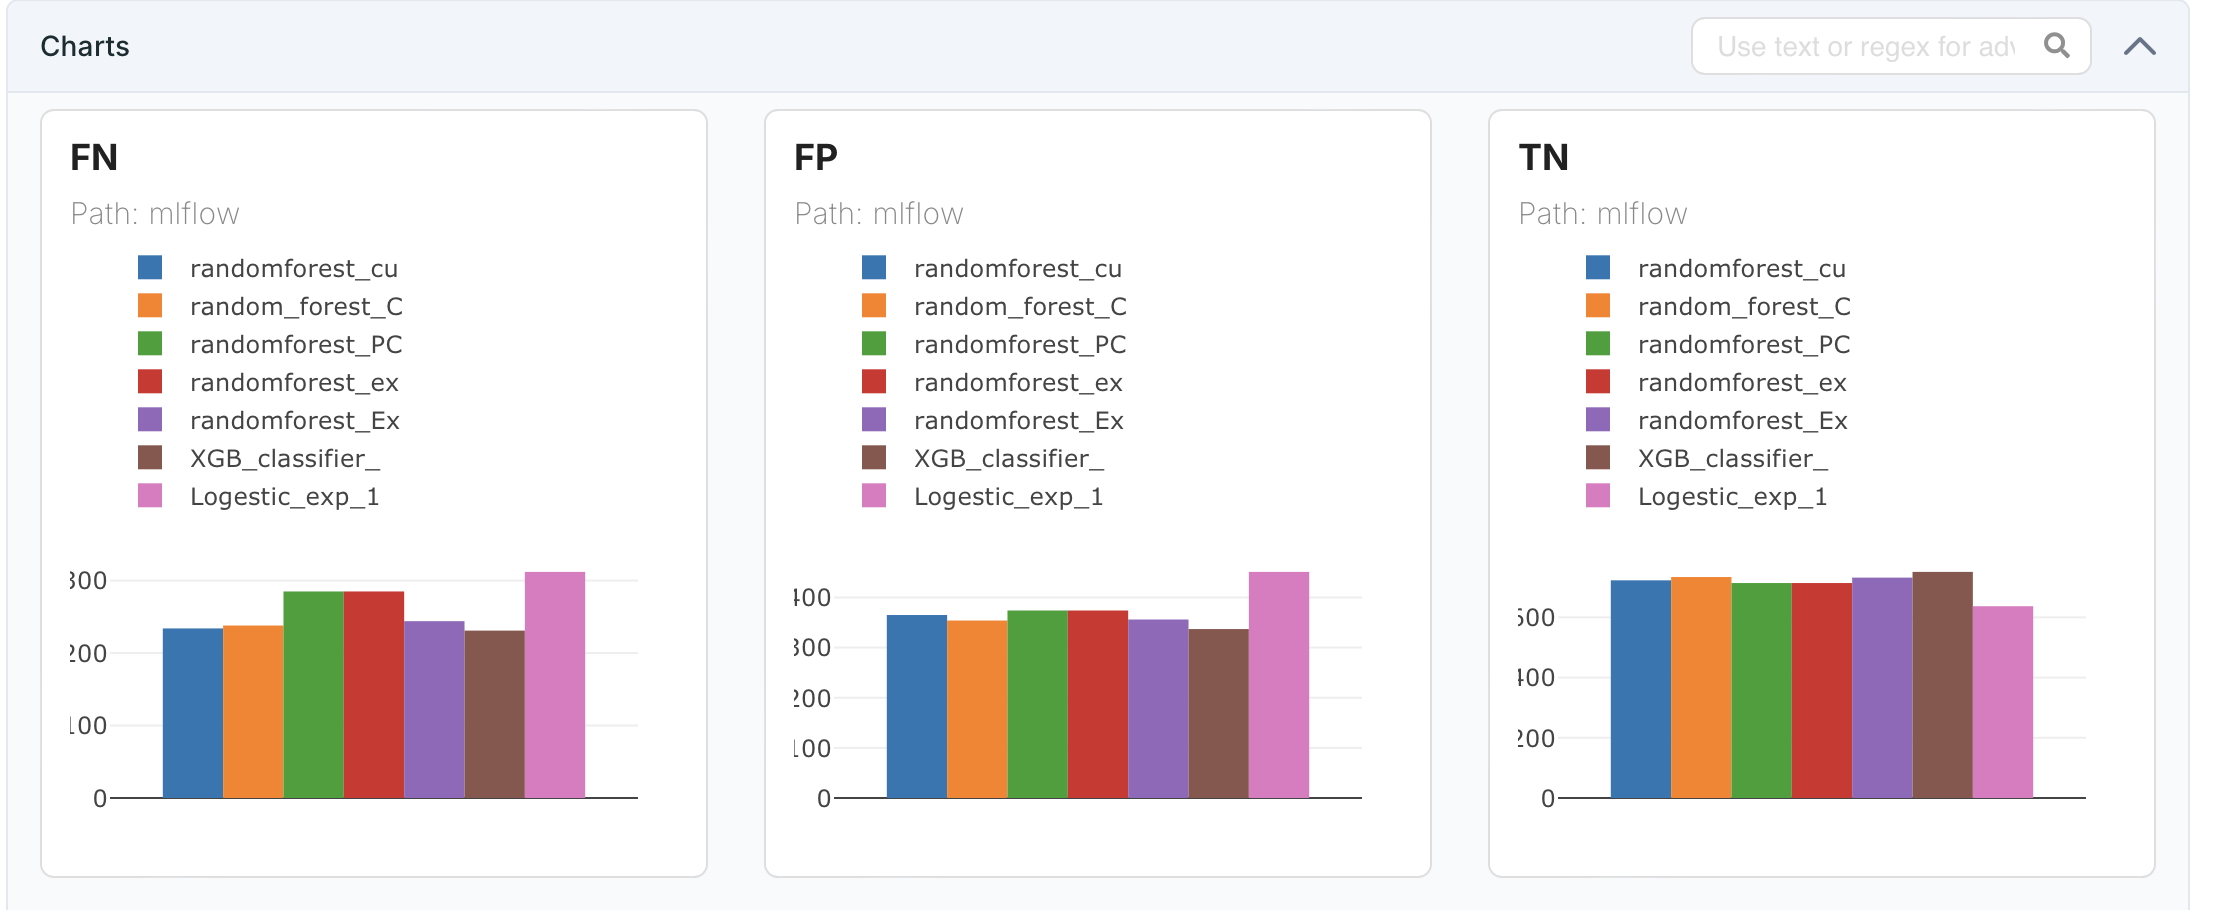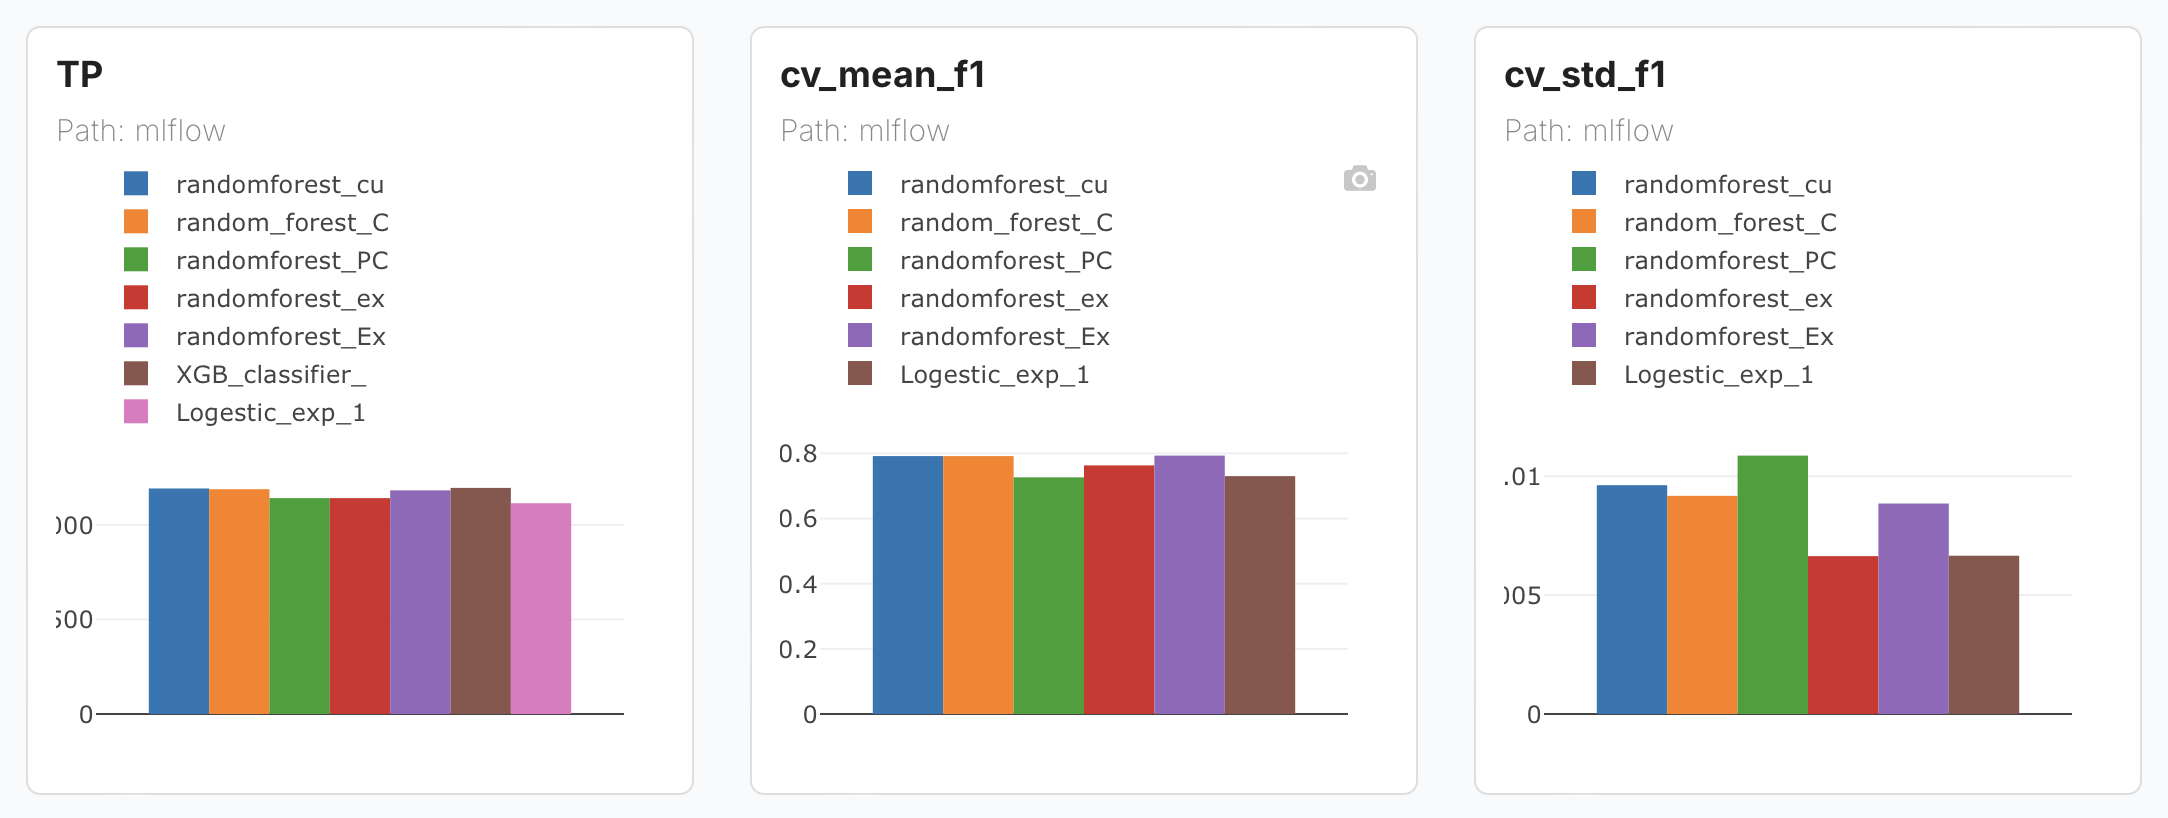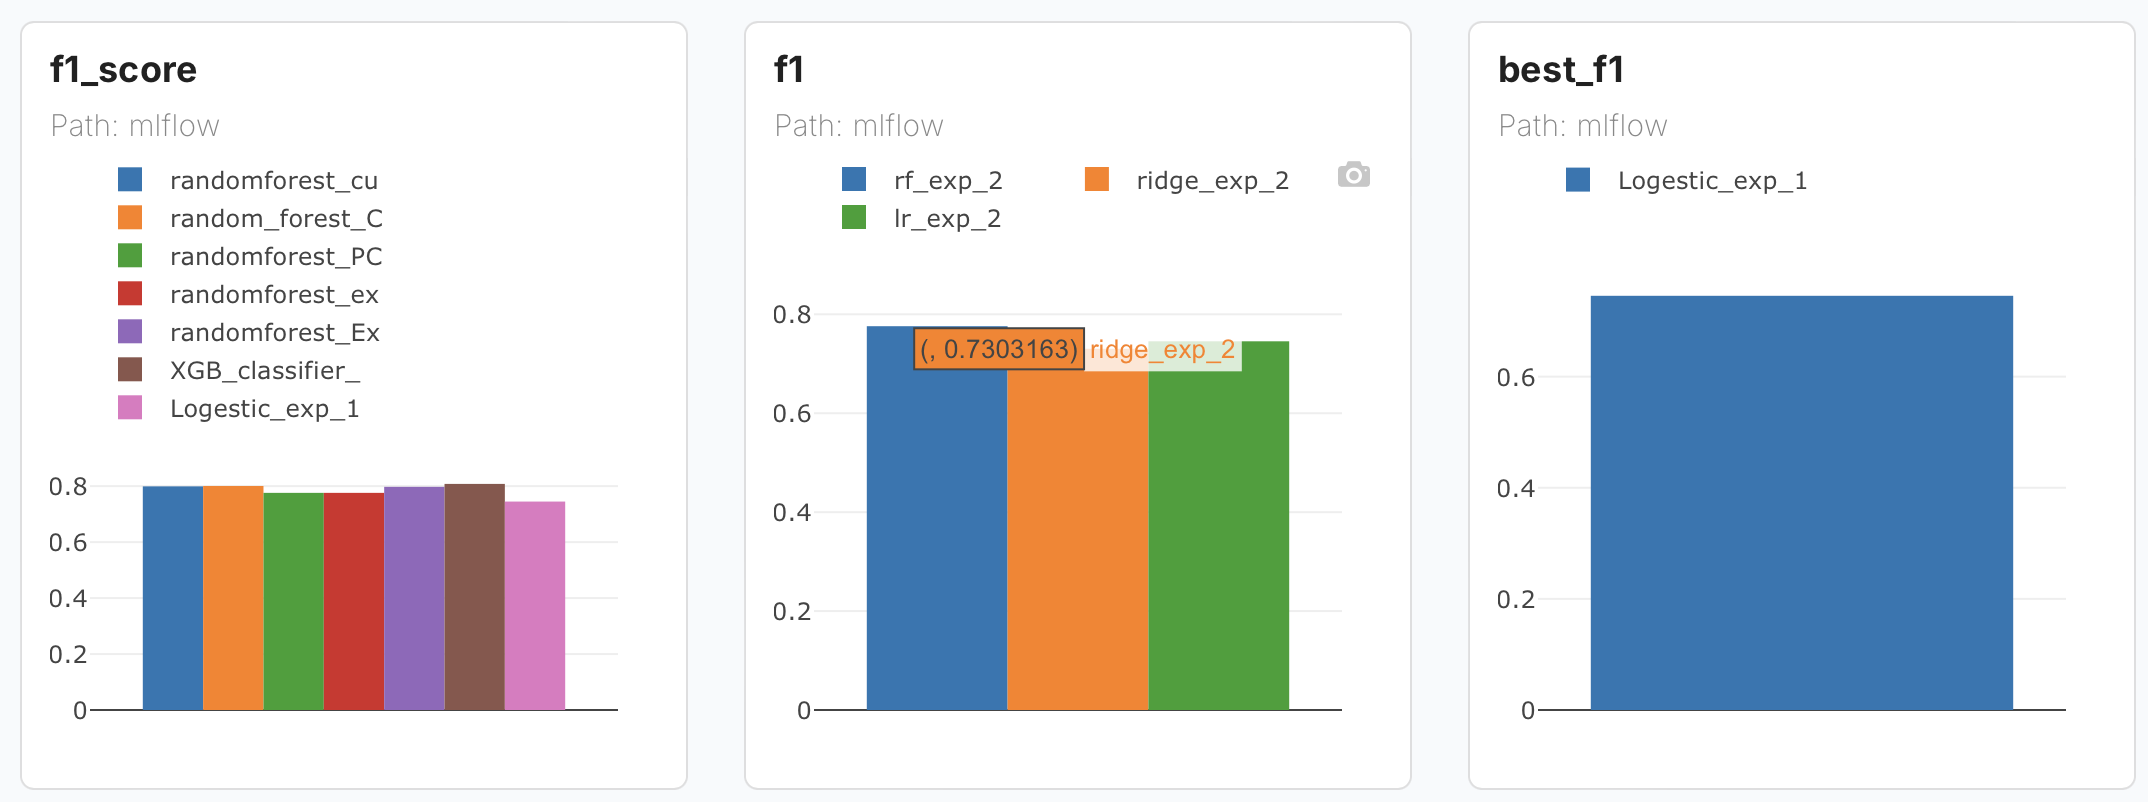

In [ ]:
!python --version


Python 3.10.12


In [ ]:
# !pip freeze > requirements.txt


Error Explaination:

The project was coded in the Colab environment, while the FastAPI and Streamlit applications were developed on the local system.

An attempt was made to copy the dependencies from Colab and push them to Docker, but this process was unsuccessful. The difference between the two environments caused the error.

When the same FastAPI application was executed in the Colab environment, it worked successfully, but the port link kept changing, leading to additional challenges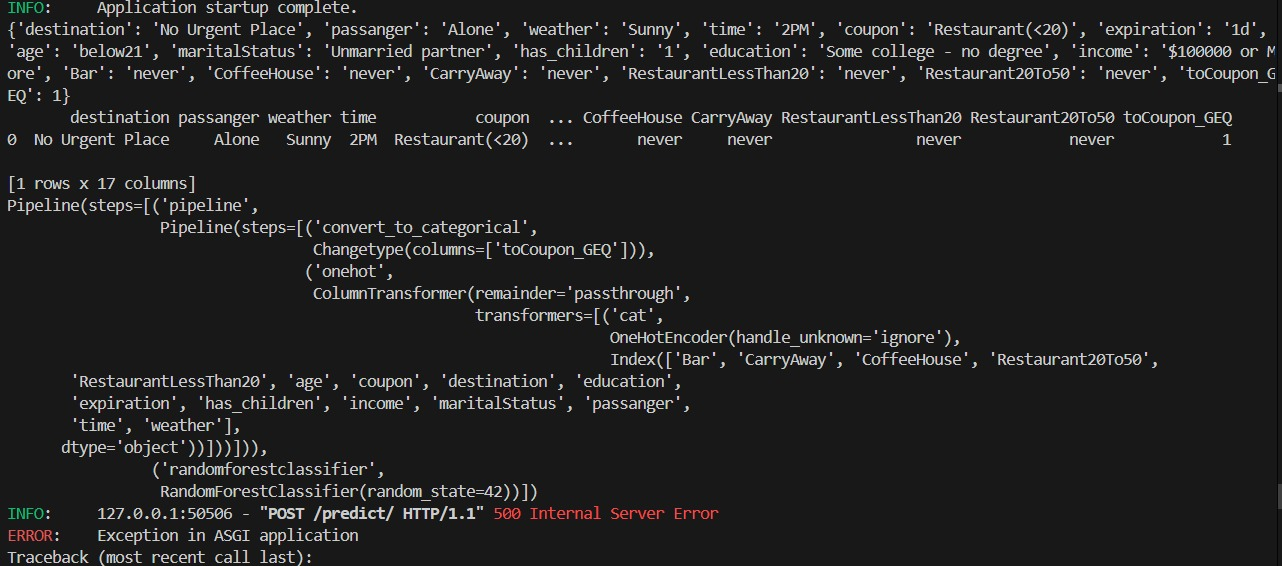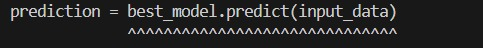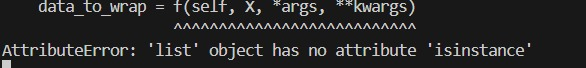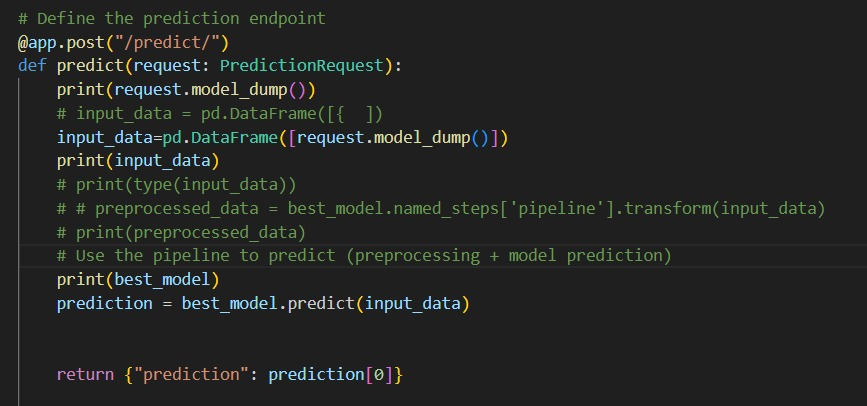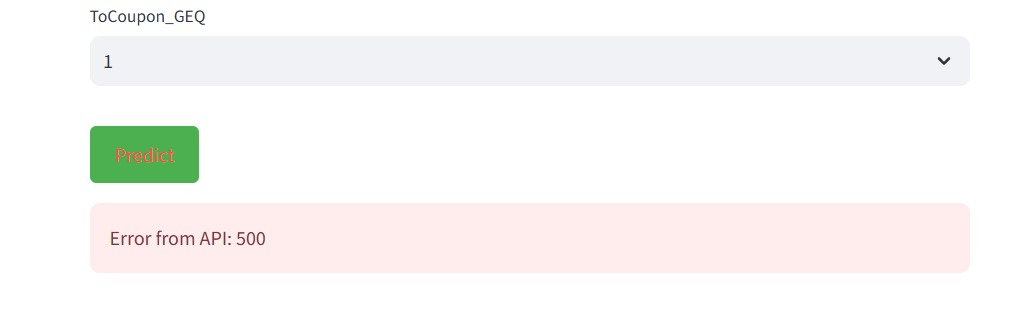.

In [57]:
import dill
import json

with open("best_model.pkl", "rb") as model_file:
    best_model = dill.load(model_file)

with open("input_data.json", "r") as json_file:
    input_data = json.load(json_file)
print(input_data)
input_data=pd.DataFrame([input_data])

# print(type(input_data))
# # preprocessed_data = best_model.named_steps['pipeline'].transform(input_data)
# print(preprocessed_data)
# Use the pipeline to predict (preprocessing + model prediction)
# print(best_model)
prediction = best_model.predict(input_data)
print(f'prediction:{prediction}')

{'destination': 'No Urgent Place', 'passanger': 'Alone', 'weather': 'Sunny', 'time': '2PM', 'coupon': 'Restaurant(<20)', 'expiration': '1d', 'age': 'below21', 'maritalStatus': 'Unmarried partner', 'has_children': '1', 'education': 'Some college - no degree', 'income': '$100000 or More', 'Bar': 'never', 'CoffeeHouse': 'never', 'CarryAway': 'never', 'RestaurantLessThan20': 'never', 'Restaurant20To50': 'never', 'toCoupon_GEQ': '1'}
prediction:[1]
